In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection
import itertools
from collections import defaultdict
import time

# Load Data

In [2]:
seed = 5
data_path = "ObesityDataSet_raw_and_data_sinthetic.csv"


In [3]:
from sklearn import preprocessing

# Read data
data = pd.read_csv(data_path, header=0)



to_encode = ['Gender', 'family_history_with_overweight', 'CAEC', 'SMOKE', 'FAVC', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
label_encoder = preprocessing.LabelEncoder()

df = data[to_encode]
df = df.apply(label_encoder.fit_transform)

data = data.drop(to_encode, axis=1)
data = pd.concat([data, df], axis=1)


data.describe()

# Last column represnets label, and others are features
features = np.array(data.iloc[:, 0:-1])



In [4]:
label_list = []
for item in data.iloc[:, -1]:
    if item >= 4:
        label_list.append(1)
    else:
        label_list.append(0)

classes = np.asarray(label_list)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b16854198>,
      dtype=object)

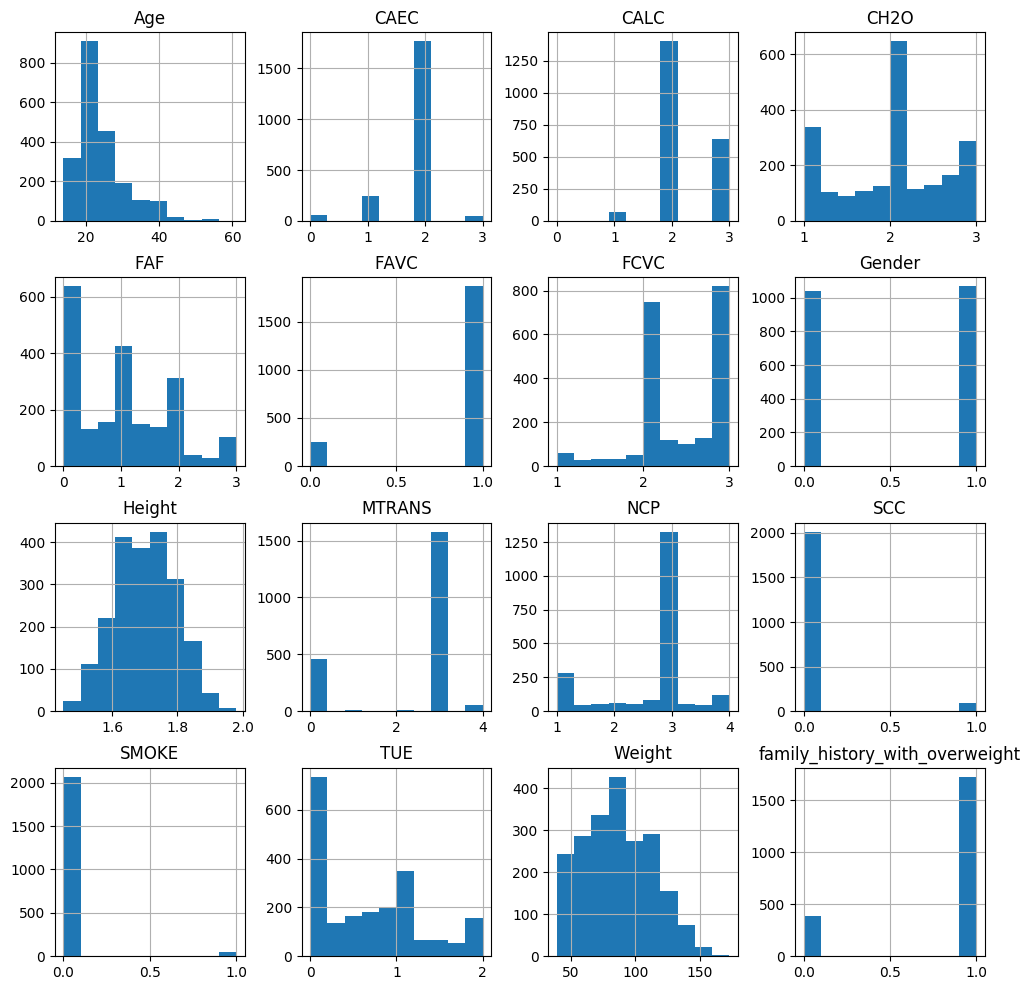

In [5]:
data.iloc[:, 0:-1].hist(figsize=(12, 12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b15d79c18>]],
      dtype=object)

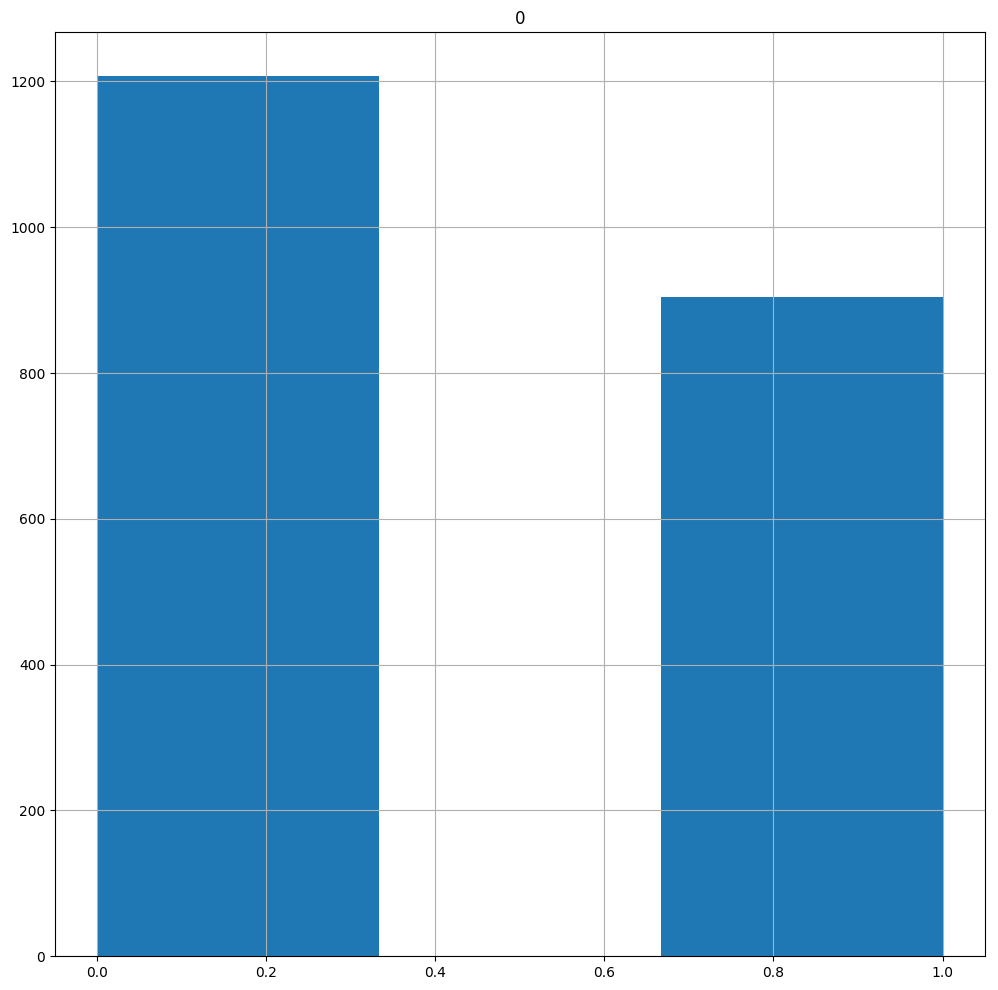

In [6]:
# draw hist for dataset
pd.DataFrame(label_list).hist(figsize=(12, 12), bins=3)


In [7]:
# split data
training_x, testing_x, training_y, testing_y = sklearn.model_selection.train_test_split(
features, classes, test_size=0.2, random_state=seed, stratify=classes)

In [8]:
print(training_x.shape)
print(testing_x.shape)
print(training_y.shape)
print(testing_y.shape)

(1688, 16)
(423, 16)
(1688,)
(423,)


In [9]:
from sklearn.preprocessing import StandardScaler

features = StandardScaler().fit_transform(features)
training_x = StandardScaler().fit_transform(training_x)
testing_x = StandardScaler().fit_transform(testing_x)

In [10]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.utils import compute_sample_weight


In [11]:
import mlrose_hiive


# Grad

In [66]:
learning_rates = [10 ** -x for x in np.arange(2.0, 6.0)]

test_acc_grad_best = 0.0
train_acc_grad_list = []
test_acc_grad_list = []

for learning_rate in learning_rates:
        nn_grad = mlrose_hiive.NeuralNetwork(hidden_nodes = [16,16], activation ='sigmoid', 
                                        algorithm ='gradient_descent', 
                                        max_iters = 10000, bias = True, is_classifier = True, 
                                        learning_rate = learning_rate, early_stopping = True, 
                                        max_attempts = 100, random_state = seed, curve = True)

        nn_grad.fit(training_x, training_y)
        
        train_pred_grad = nn_grad.predict(training_x)
        train_acc_grad = accuracy_score(training_y, train_pred_grad)
        train_acc_grad_list.append(train_acc_grad)
        
        test_pred_grad = nn_grad.predict(testing_x)
        test_acc_grad = accuracy_score(testing_y, test_pred_grad)
        test_acc_grad_list.append(test_acc_grad)

        if test_acc_grad > test_acc_grad_best:
            nn_grad_best = nn_grad
            test_acc_grad_best = test_acc_grad
            test_pred_grad_best = test_pred_grad
            
print(nn_grad_best)


NeuralNetwork(activation='sigmoid', algorithm='gradient_descent', bias=True,
              clip_max=10000000000.0, curve=True, early_stopping=True,
              hidden_nodes=[16, 16], is_classifier=True, learning_rate=0.001,
              max_attempts=100, max_iters=10000, mutation_prob=0.1,
              pop_size=200, random_state=5, restarts=0,
              schedule=GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001))


Text(0.5,107.986,'Predicted label')

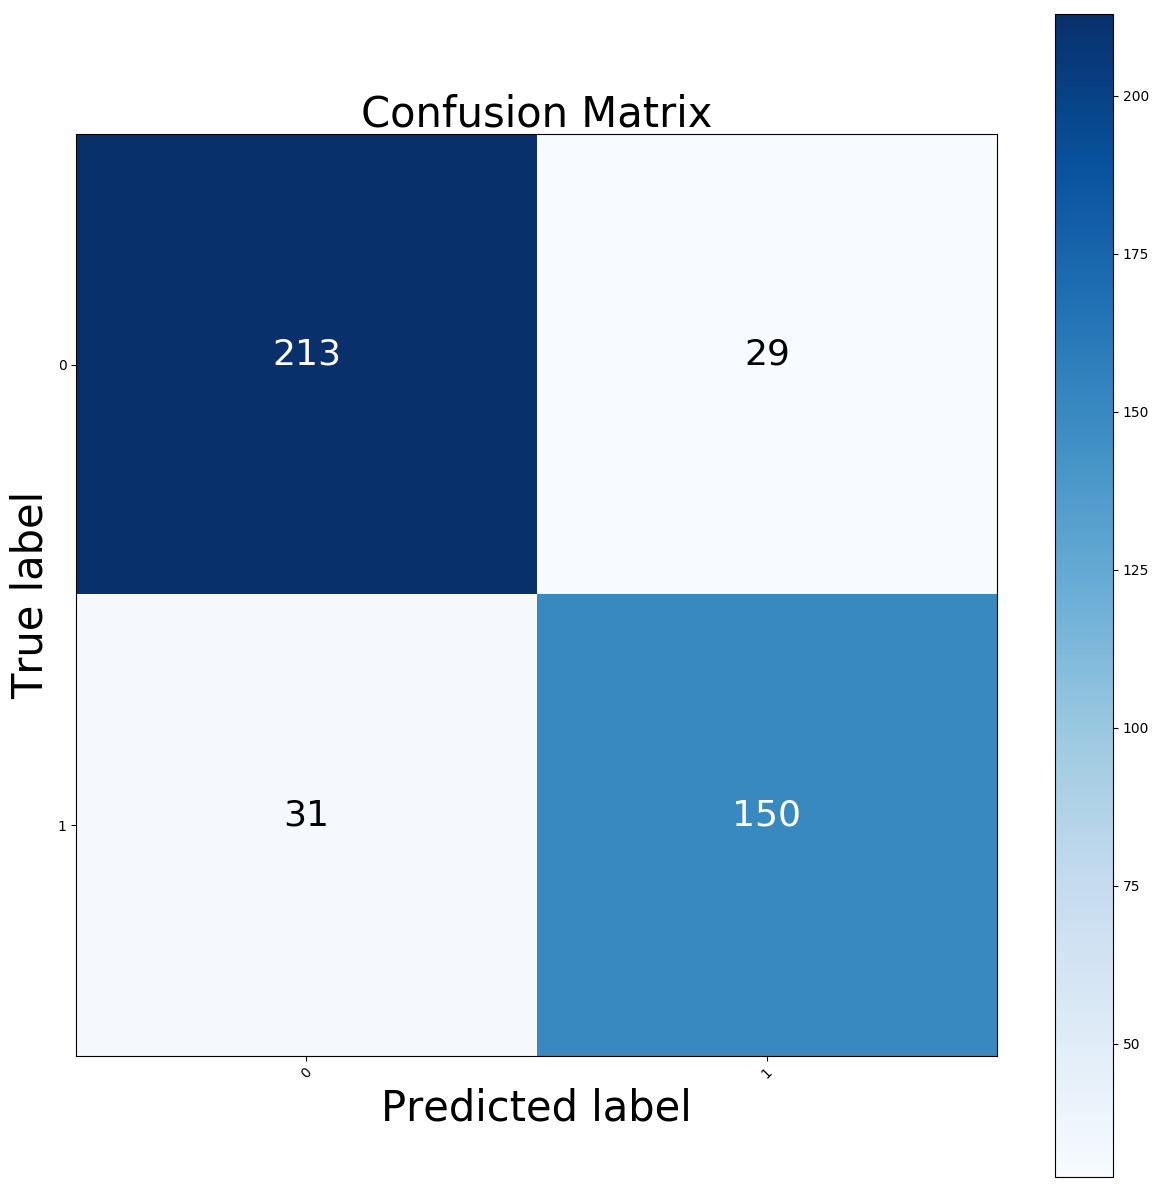

In [24]:
from sklearn.metrics import confusion_matrix

# calculate
confusion_matrix = confusion_matrix(testing_y, test_pred_grad_best)
normed_confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
num_classes = np.unique(classes)

cmap=plt.cm.Blues
plt.close()
plt.figure(figsize=(12, 12))
plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix', fontsize=30)
plt.colorbar()
tick_marks = np.arange(len(num_classes))
plt.xticks(tick_marks, num_classes, rotation=45)
plt.yticks(tick_marks, num_classes)
plt.tight_layout()

fmt = 'd'
thresh = confusion_matrix.max() / 2.0

for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
    plt.text(j, i, format(confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color='white' if confusion_matrix[i, j] > thresh else "black",
            size=26)


plt.tight_layout()
plt.ylabel('True label', fontsize=30)
plt.xlabel('Predicted label', fontsize=30)






Text(0.5,107.986,'Predicted label')

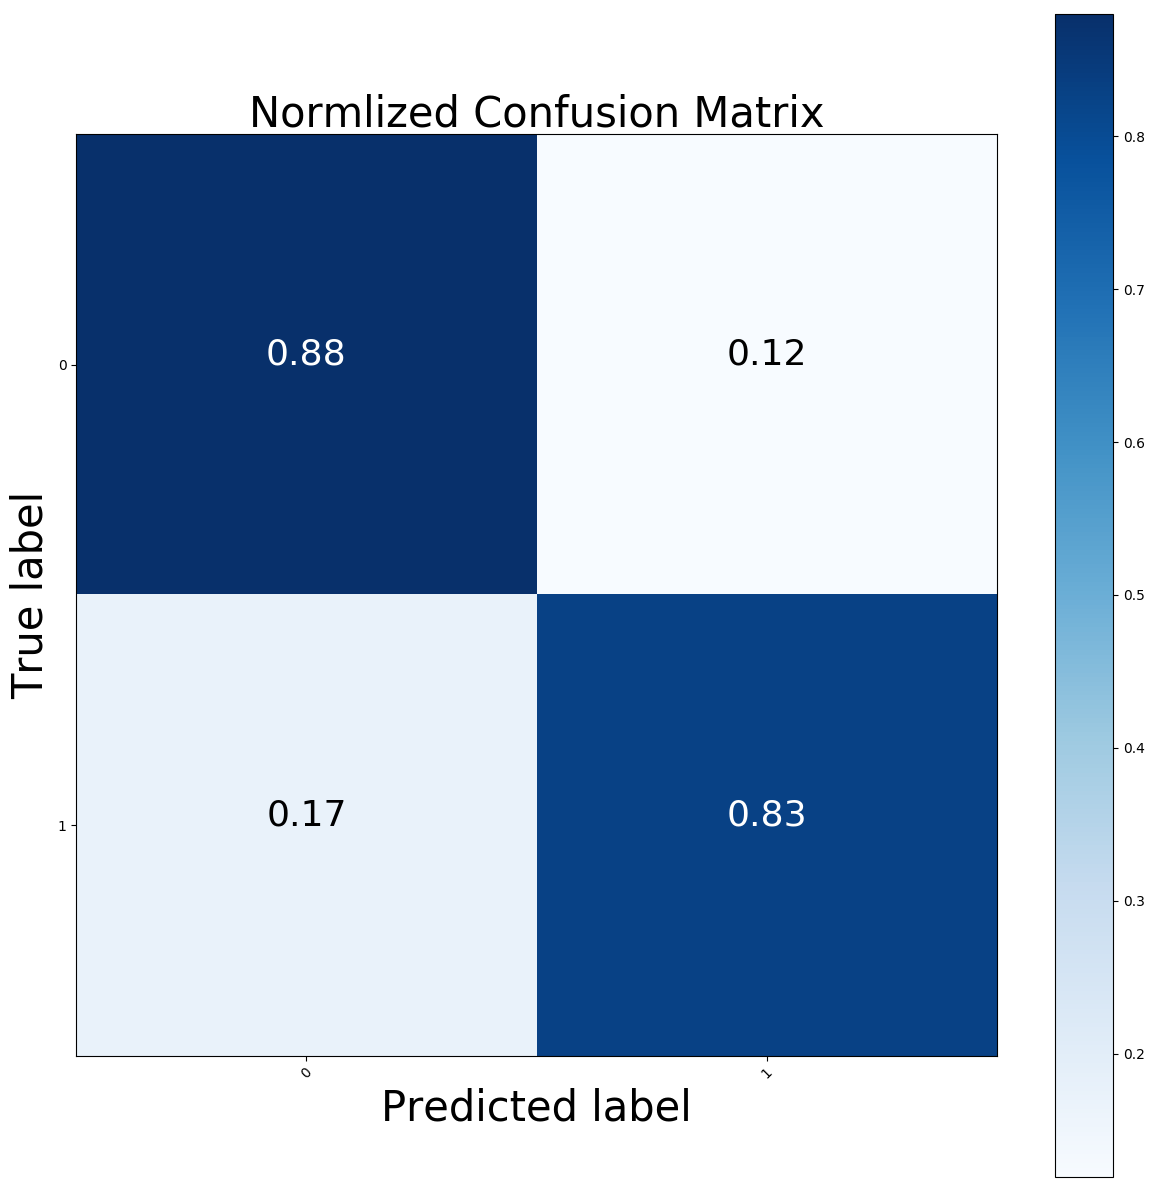

In [25]:
plt.close()
plt.figure(figsize=(12, 12))
plt.imshow(normed_confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Normlized Confusion Matrix', fontsize=30)
plt.colorbar()
tick_marks = np.arange(len(num_classes))
plt.xticks(tick_marks, num_classes, rotation=45)
plt.yticks(tick_marks, num_classes)
plt.tight_layout()

fmt = '.2f'
thresh = confusion_matrix.max() / 2.0
for i, j in itertools.product(range(normed_confusion_matrix.shape[0]), range(normed_confusion_matrix.shape[1])):
    plt.text(j, i, format(normed_confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color='white' if confusion_matrix[i, j] > thresh else "black",
            size=26)

plt.tight_layout()
plt.ylabel('True label', fontsize=30)
plt.xlabel('Predicted label', fontsize=30)

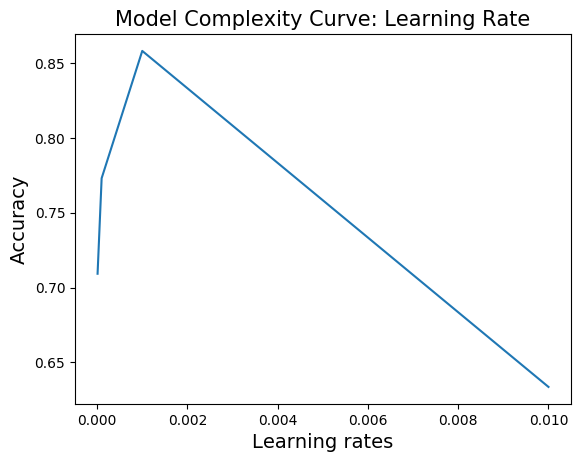

In [26]:
learning_rates = [10 ** -x for x in np.arange(2.0, 6.0)]

fig,ax = plt.subplots()

ax.plot(learning_rates, test_acc_grad_list)
ax.set_xlabel("Learning rates",fontsize=14)
ax.set_ylabel("Accuracy",fontsize=14)

plt.title("Grad Complexity Curve: Learning Rate",fontsize=15)
plt.show()

Text(0.5,1,'Loss vs. Iterations for Grad')

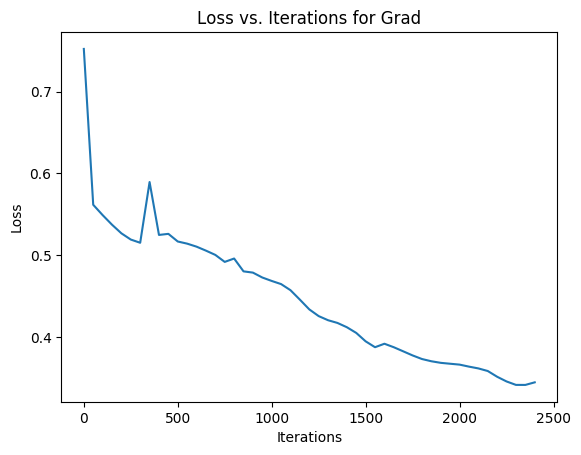

In [38]:
index = range(0, len(nn_grad_best.fitness_curve), 50)


plt.figure()

plt.plot(index, -nn_grad_best.fitness_curve[index])

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations for Grad')


In [40]:
train_sizes = np.append(np.linspace(0.05, 0.1, 20, endpoint=False),
                            np.linspace(0.1, 1, 20, endpoint=True))

grad_acc_train_sizes, grad_acc_train_scores, grad_acc_test_scores = sklearn.model_selection.learning_curve(
    nn_grad_best,
    training_x,
    training_y,
    cv=5,
    train_sizes=train_sizes,
    verbose=10,
    scoring=make_scorer(accuracy_score),
    n_jobs=4,
    random_state=seed)

[learning_curve] Training set sizes: [  67   70   74   77   81   84   87   91   94   97  101  104  108  111
  114  118  121  124  128  131  135  198  262  326  390  454  518  582
  646  710  774  838  902  966 1030 1094 1158 1222 1286 1350]


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of 200 | elapsed:   29.7s remaining:  7.8min
[Parallel(n_jobs=4)]: Done  33 out of 200 | elapsed:  1.3min remaining:  6.6min
[Parallel(n_jobs=4)]: Done  54 out of 200 | elapsed:  2.2min remaining:  6.0min
[Parallel(n_jobs=4)]: Done  75 out of 200 | elapsed:  2.9min remaining:  4.9min
[Parallel(n_jobs=4)]: Done  96 out of 200 | elapsed:  4.0min remaining:  4.3min
[Parallel(n_jobs=4)]: Done 117 out of 200 | elapsed:  4.8min remaining:  3.4min
[Parallel(n_jobs=4)]: Done 138 out of 200 | elapsed:  5.7min remaining:  2.6min
[Parallel(n_jobs=4)]: Done 159 out of 200 | elapsed:  6.5min remaining:  1.7min
[Parallel(n_jobs=4)]: Done 180 out of 200 | elapsed:  7.5min remaining:   49.7s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:  8.3min finished


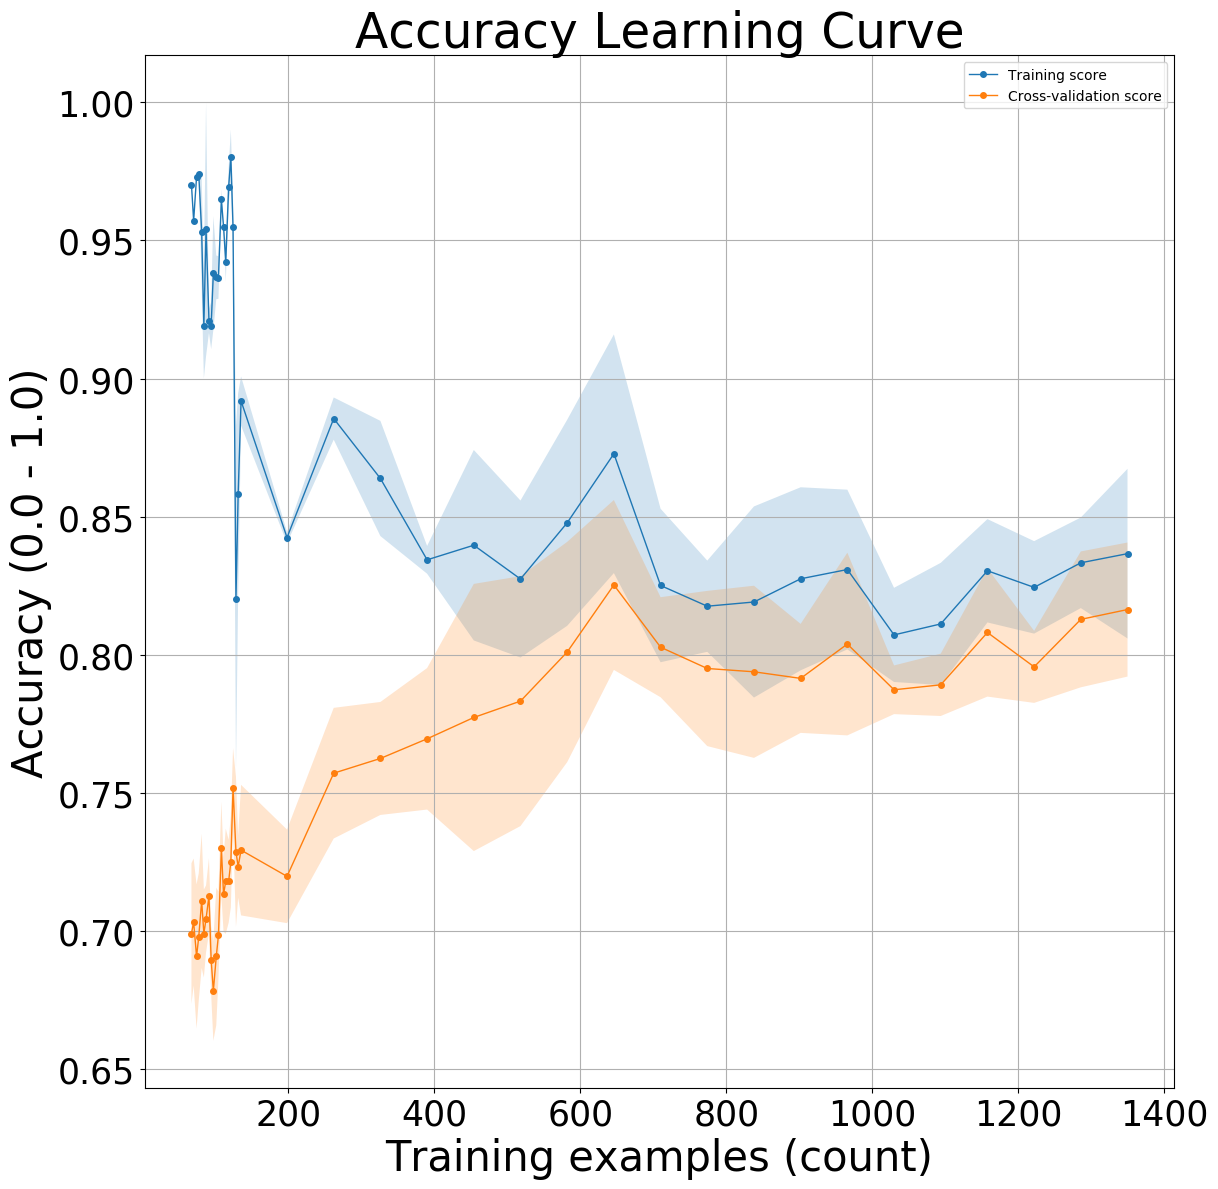

[CV]  ................................................................
[CV] ................ , score=(train=0.957, test=0.683), total=   9.9s
[CV]  ................................................................
[CV] ................ , score=(train=0.881, test=0.680), total=   7.4s
[CV]  ................................................................
[CV] ................ , score=(train=0.979, test=0.645), total=  10.0s
[CV]  ................................................................
[CV] ................ , score=(train=0.956, test=0.701), total=   7.8s
[CV]  ................................................................
[CV] ................ , score=(train=0.935, test=0.772), total=   8.1s
[CV]  ................................................................
[CV] ................ , score=(train=0.838, test=0.704), total=   5.9s
[CV]  ................................................................
[CV] ................ , score=(train=0.844, test=0.793), total=   5.7s
[CV]  

[CV]  ................................................................
[CV] ................ , score=(train=0.974, test=0.719), total=  10.0s
[CV]  ................................................................
[CV] ................ , score=(train=0.862, test=0.704), total=   7.7s
[CV]  ................................................................
[CV] ................ , score=(train=0.921, test=0.645), total=  10.4s
[CV]  ................................................................
[CV] ................ , score=(train=0.983, test=0.695), total=  10.8s
[CV]  ................................................................
[CV] ................ , score=(train=0.931, test=0.728), total=   7.9s
[CV]  ................................................................
[CV] ................ , score=(train=0.822, test=0.778), total=   3.7s
[CV]  ................................................................
[CV] ................ , score=(train=0.888, test=0.778), total=   7.6s
[CV]  

In [41]:
plt.close()
plt.figure(figsize=(12, 12))
plt.tick_params(labelsize=25)

plt.title('Accuracy Learning Curve', fontsize=35)

plt.xlabel('Training examples (count)', fontsize=30)
plt.ylabel('Accuracy (0.0 - 1.0)', fontsize=30)
plt.grid()
plt.tight_layout()

train_scores = grad_acc_train_scores
test_scores = grad_acc_test_scores
train_sizes = grad_acc_train_sizes

train_points = train_scores
test_points = test_scores

ax = plt.gca()
ax.set_xscale("linear")
ax.set_yscale("linear")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
train_points = train_scores_mean
test_points = test_scores_mean

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2)

plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
         label="Training score")
plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
         label="Cross-validation score")

plt.legend(loc="best")



# RHC

In [43]:
learning_rates = [10 ** -x for x in np.arange(2.0, 6.0)]
restarts = [5, 10, 20, 50]

test_acc_rhc_best = 0.0
train_acc_rhc_list = []
test_acc_rhc_list = []

for learning_rate in learning_rates:
    print(learning_rate)
    restart_train_acc_rhc_list = []
    restart_test_acc_rhc_list = []
    for restart in restarts:
        print(restart)
        nn_rhc = mlrose_hiive.NeuralNetwork(hidden_nodes = [16,16], activation ='sigmoid', 
                                        algorithm ='random_hill_climb', restarts=restart,
                                        max_iters = 10000, bias = True, is_classifier = True, 
                                        learning_rate = learning_rate, early_stopping = True, 
                                        max_attempts = 100, random_state = seed, curve = True)

        nn_rhc.fit(training_x, training_y)
        
        train_pred_rhc = nn_rhc.predict(training_x)
        train_acc_rhc = accuracy_score(training_y, train_pred_rhc)
        restart_train_acc_rhc_list.append(train_acc_rhc)
        
        test_pred_rhc = nn_rhc.predict(testing_x)
        test_acc_rhc = accuracy_score(testing_y, test_pred_rhc)
        restart_test_acc_rhc_list.append(test_acc_rhc)

        if test_acc_rhc > test_acc_rhc_best:
            nn_rhc_best = nn_rhc
            test_acc_rhc_best = test_acc_rhc
            test_pred_rhc_best = test_pred_rhc
            
    test_acc_rhc_list.append(restart_test_acc_rhc_list)
    train_acc_rhc_list.append(restart_train_acc_rhc_list)
            
print(nn_rhc_best)


0.01
5
10
[CV]  ................................................................
[CV] ................ , score=(train=0.500, test=0.571), total=   8.2s
[CV]  ................................................................
[CV] ................ , score=(train=0.488, test=0.571), total=   8.1s
[CV]  ................................................................
[CV] ................ , score=(train=0.515, test=0.571), total=   7.3s
[CV]  ................................................................
[CV] ................ , score=(train=0.532, test=0.571), total=   8.3s
[CV]  ................................................................
[CV] ................ , score=(train=0.516, test=0.571), total=   8.4s
[CV]  ................................................................
[CV] ................ , score=(train=0.565, test=0.571), total=   9.7s
[CV]  ................................................................
[CV] ................ , score=(train=0.566, test=0.571), total=  11

[CV]  ................................................................
[CV] ................ , score=(train=0.493, test=0.571), total=   7.9s
[CV]  ................................................................
[CV] ................ , score=(train=0.506, test=0.571), total=   7.9s
[CV]  ................................................................
[CV] ................ , score=(train=0.521, test=0.571), total=   7.8s
[CV]  ................................................................
[CV] ................ , score=(train=0.528, test=0.571), total=   7.9s
[CV]  ................................................................
[CV] ................ , score=(train=0.529, test=0.571), total=   8.3s
[CV]  ................................................................
[CV] ................ , score=(train=0.526, test=0.571), total=   7.8s
[CV]  ................................................................
[CV] ................ , score=(train=0.559, test=0.571), total=  10.2s
[CV]  

20
50
0.001
5
10
20
50
0.0001
5
10
20
50
1e-05
5
10
20
50
NeuralNetwork(activation='sigmoid', algorithm='random_hill_climb', bias=True,
              clip_max=10000000000.0, curve=True, early_stopping=True,
              hidden_nodes=[16, 16], is_classifier=True, learning_rate=0.01,
              max_attempts=100, max_iters=10000, mutation_prob=0.1,
              pop_size=200, random_state=5, restarts=50,
              schedule=GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001))


Text(0.5, 107.98604349146878, 'Predicted label')

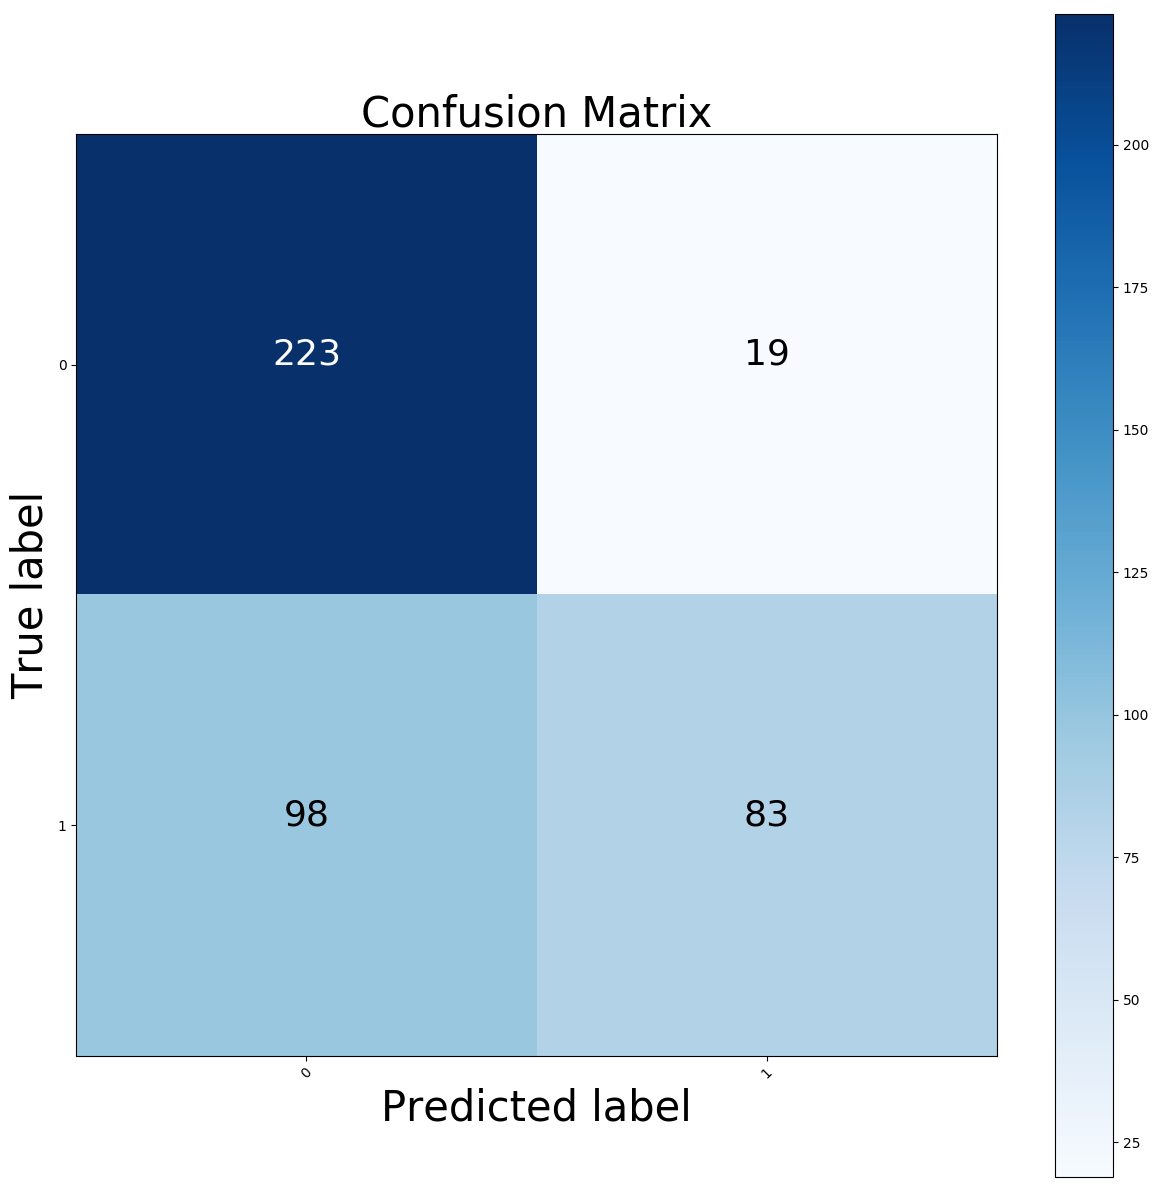

In [44]:
from sklearn.metrics import confusion_matrix

# calculate
confusion_matrix = confusion_matrix(testing_y, test_pred_rhc_best)
normed_confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
num_classes = np.unique(classes)

cmap=plt.cm.Blues
plt.close()
plt.figure(figsize=(12, 12))
plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix', fontsize=30)
plt.colorbar()
tick_marks = np.arange(len(num_classes))
plt.xticks(tick_marks, num_classes, rotation=45)
plt.yticks(tick_marks, num_classes)
plt.tight_layout()

fmt = 'd'
thresh = confusion_matrix.max() / 2.0

for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
    plt.text(j, i, format(confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color='white' if confusion_matrix[i, j] > thresh else "black",
            size=26)


plt.tight_layout()
plt.ylabel('True label', fontsize=30)
plt.xlabel('Predicted label', fontsize=30)






Text(0.5, 107.98604349146878, 'Predicted label')

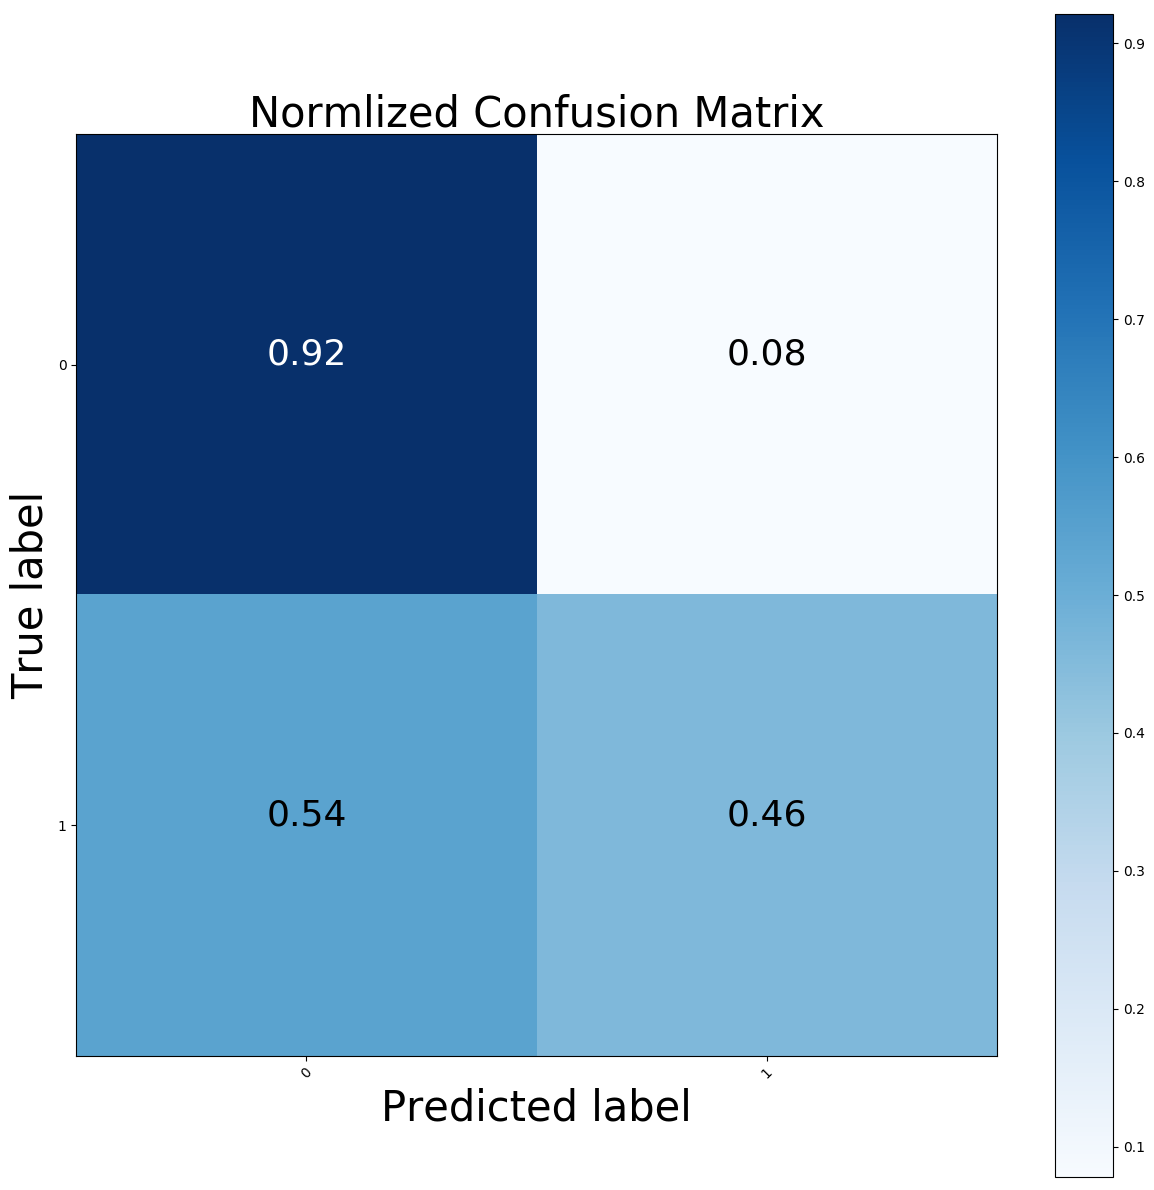

In [45]:
plt.close()
plt.figure(figsize=(12, 12))
plt.imshow(normed_confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Normlized Confusion Matrix', fontsize=30)
plt.colorbar()
tick_marks = np.arange(len(num_classes))
plt.xticks(tick_marks, num_classes, rotation=45)
plt.yticks(tick_marks, num_classes)
plt.tight_layout()

fmt = '.2f'
thresh = confusion_matrix.max() / 2.0
for i, j in itertools.product(range(normed_confusion_matrix.shape[0]), range(normed_confusion_matrix.shape[1])):
    plt.text(j, i, format(normed_confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color='white' if confusion_matrix[i, j] > thresh else "black",
            size=26)

plt.tight_layout()
plt.ylabel('True label', fontsize=30)
plt.xlabel('Predicted label', fontsize=30)

(4, 4)


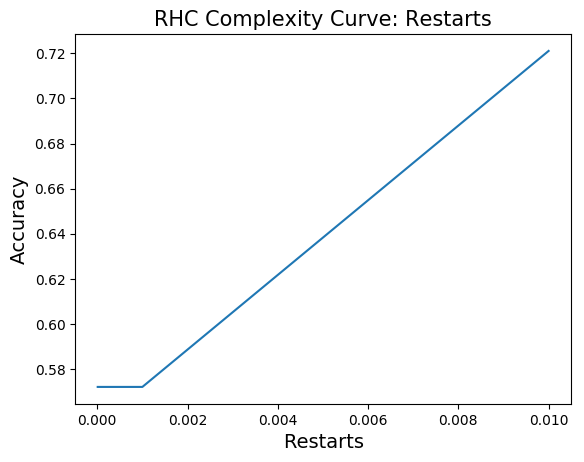

In [55]:
learning_rates = [10 ** -x for x in np.arange(2.0, 6.0)]
restarts = [5, 10, 20, 50, 100]

test_acc_rhc_list_ = np.asarray(test_acc_rhc_list).T
print(test_acc_rhc_list_.shape)
fig,ax = plt.subplots()

ax.plot(learning_rates, test_acc_rhc_list_[0, :])
ax.set_xlabel("Restarts",fontsize=14)
ax.set_ylabel("Accuracy",fontsize=14)


plt.title("RHC Complexity Curve: Restarts",fontsize=15)
plt.show()

Text(0.5, 1.0, 'Loss vs. Iterations for RHC')

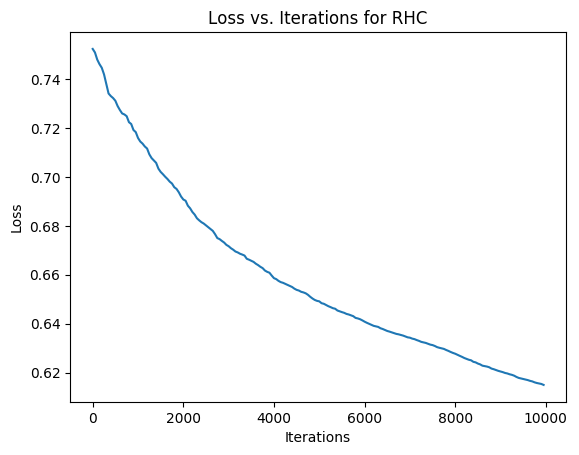

In [60]:
index = range(0, len(nn_rhc_best.fitness_curve), 50)


plt.figure()

plt.plot(index, nn_rhc_best.fitness_curve[index, 0])

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations for RHC')


In [46]:
train_sizes = np.append(np.linspace(0.05, 0.1, 20, endpoint=False),
                            np.linspace(0.1, 1, 20, endpoint=True))

rhc_acc_train_sizes, rhc_acc_train_scores, rhc_acc_test_scores = sklearn.model_selection.learning_curve(
    nn_rhc_best,
    training_x,
    training_y,
    cv=5,
    train_sizes=train_sizes,
    verbose=10,
    scoring=make_scorer(accuracy_score),
    n_jobs=4,
    random_state=seed)

[learning_curve] Training set sizes: [  67   70   74   77   81   84   87   91   94   97  101  104  108  111
  114  118  121  124  128  131  135  198  262  326  390  454  518  582
  646  710  774  838  902  966 1030 1094 1158 1222 1286 1350]


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of 200 | elapsed: 371.4min remaining: 5818.0min
[Parallel(n_jobs=4)]: Done  33 out of 200 | elapsed: 410.3min remaining: 2076.2min
[Parallel(n_jobs=4)]: Done  54 out of 200 | elapsed: 445.9min remaining: 1205.7min
[Parallel(n_jobs=4)]: Done  75 out of 200 | elapsed: 486.2min remaining: 810.4min
[Parallel(n_jobs=4)]: Done  96 out of 200 | elapsed: 518.1min remaining: 561.3min
[Parallel(n_jobs=4)]: Done 117 out of 200 | elapsed: 566.8min remaining: 402.1min
[Parallel(n_jobs=4)]: Done 138 out of 200 | elapsed: 593.3min remaining: 266.6min
[Parallel(n_jobs=4)]: Done 159 out of 200 | elapsed: 642.5min remaining: 165.7min
[Parallel(n_jobs=4)]: Done 180 out of 200 | elapsed: 667.7min remaining: 74.2min


[CV]  ................................................................
[CV] ............... , score=(train=0.672, test=0.663), total=361.6min
[CV]  ................................................................
[CV] ................ , score=(train=0.690, test=0.642), total= 4.5min
[CV]  ................................................................
[CV] ................ , score=(train=0.670, test=0.725), total= 4.6min
[CV]  ................................................................
[CV] ................ , score=(train=0.703, test=0.707), total= 4.6min
[CV]  ................................................................
[CV] ................ , score=(train=0.685, test=0.698), total= 4.8min
[CV]  ................................................................
[CV] ................ , score=(train=0.727, test=0.731), total= 5.3min
[CV]  ................................................................
[CV] ................ , score=(train=0.747, test=0.728), total= 6.8min
[CV]  

[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed: 717.4min finished


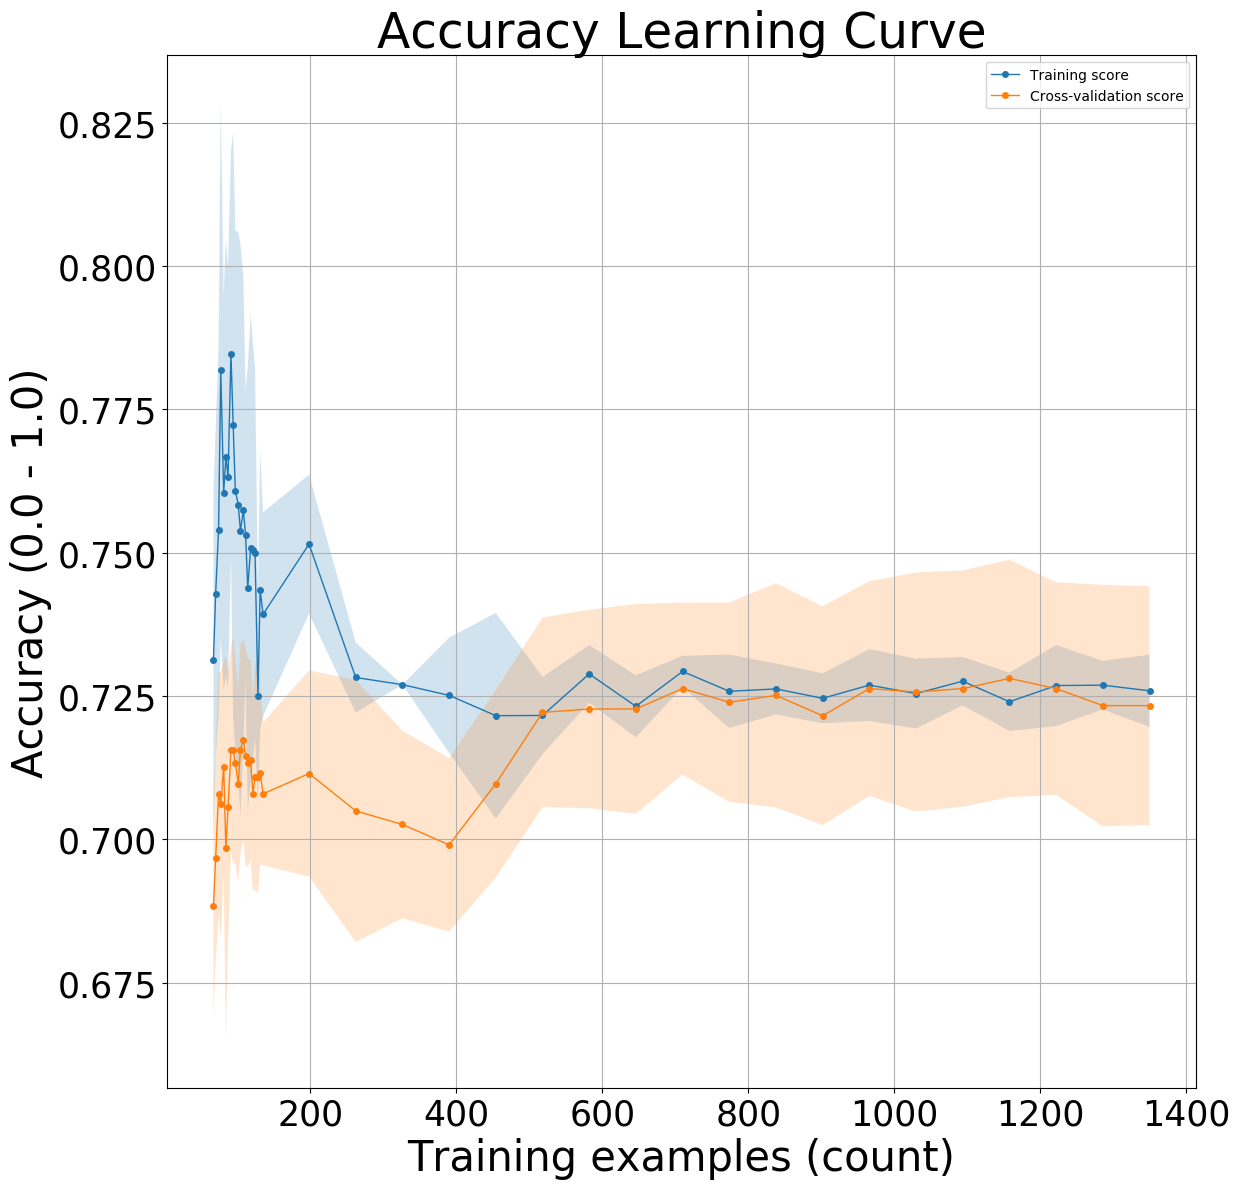

In [61]:
plt.close()
plt.figure(figsize=(12, 12))
plt.tick_params(labelsize=25)

plt.title('Accuracy Learning Curve', fontsize=35)

plt.xlabel('Training examples (count)', fontsize=30)
plt.ylabel('Accuracy (0.0 - 1.0)', fontsize=30)
plt.grid()
plt.tight_layout()

train_scores = rhc_acc_train_scores
test_scores = rhc_acc_test_scores
train_sizes = rhc_acc_train_sizes

train_points = train_scores
test_points = test_scores

ax = plt.gca()
ax.set_xscale("linear")
ax.set_yscale("linear")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
train_points = train_scores_mean
test_points = test_scores_mean

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2)

plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
         label="Training score")
plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
         label="Cross-validation score")

plt.legend(loc="best")



# GA

In [12]:
learning_rates = [10 ** -x for x in np.arange(2.0, 6.0)]
populations = [10, 20, 50, 100, 200]

test_acc_ga_best = 0.0
train_acc_ga_list = []
test_acc_ga_list = []

for learning_rate in learning_rates:
    print(learning_rate)

    pop_train_acc_ga_list = []
    pop_test_acc_ga_list = []
    for pop in populations:
        print(pop)

        nn_ga = mlrose_hiive.NeuralNetwork(hidden_nodes = [16,16], activation ='sigmoid', 
                                        algorithm ='genetic_alg', pop_size = pop,
                                        max_iters = 10000, bias = True, is_classifier = True, 
                                        learning_rate = learning_rate, early_stopping = True, 
                                        max_attempts = 100, random_state = seed, curve = True)

        nn_ga.fit(training_x, training_y)
        
        train_pred_ga = nn_ga.predict(training_x)
        train_acc_ga = accuracy_score(training_y, train_pred_ga)
        pop_train_acc_ga_list.append(train_acc_ga)
        
        test_pred_ga = nn_ga.predict(testing_x)
        test_acc_ga = accuracy_score(testing_y, test_pred_ga)
        pop_test_acc_ga_list.append(test_acc_ga)

        if test_acc_ga > test_acc_ga_best:
            nn_ga_best = nn_ga
            test_acc_ga_best = test_acc_ga
            test_pred_ga_best = test_pred_ga
            
    test_acc_ga_list.append(pop_test_acc_ga_list)
    train_acc_ga_list.append(pop_train_acc_ga_list)
            
print(nn_ga_best)


0.01
10
20
50
100
200
0.001
10
20
50
100
200
0.0001
10
20
50
100
200
1e-05
10
20
50
100
200
NeuralNetwork(activation='sigmoid', algorithm='genetic_alg', bias=True,
              clip_max=10000000000.0, curve=True, early_stopping=True,
              hidden_nodes=[16, 16], is_classifier=True, learning_rate=0.01,
              max_attempts=100, max_iters=10000, mutation_prob=0.1,
              pop_size=100, random_state=5, restarts=0,
              schedule=GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001))


Text(0.5, 107.98604349146878, 'Predicted label')

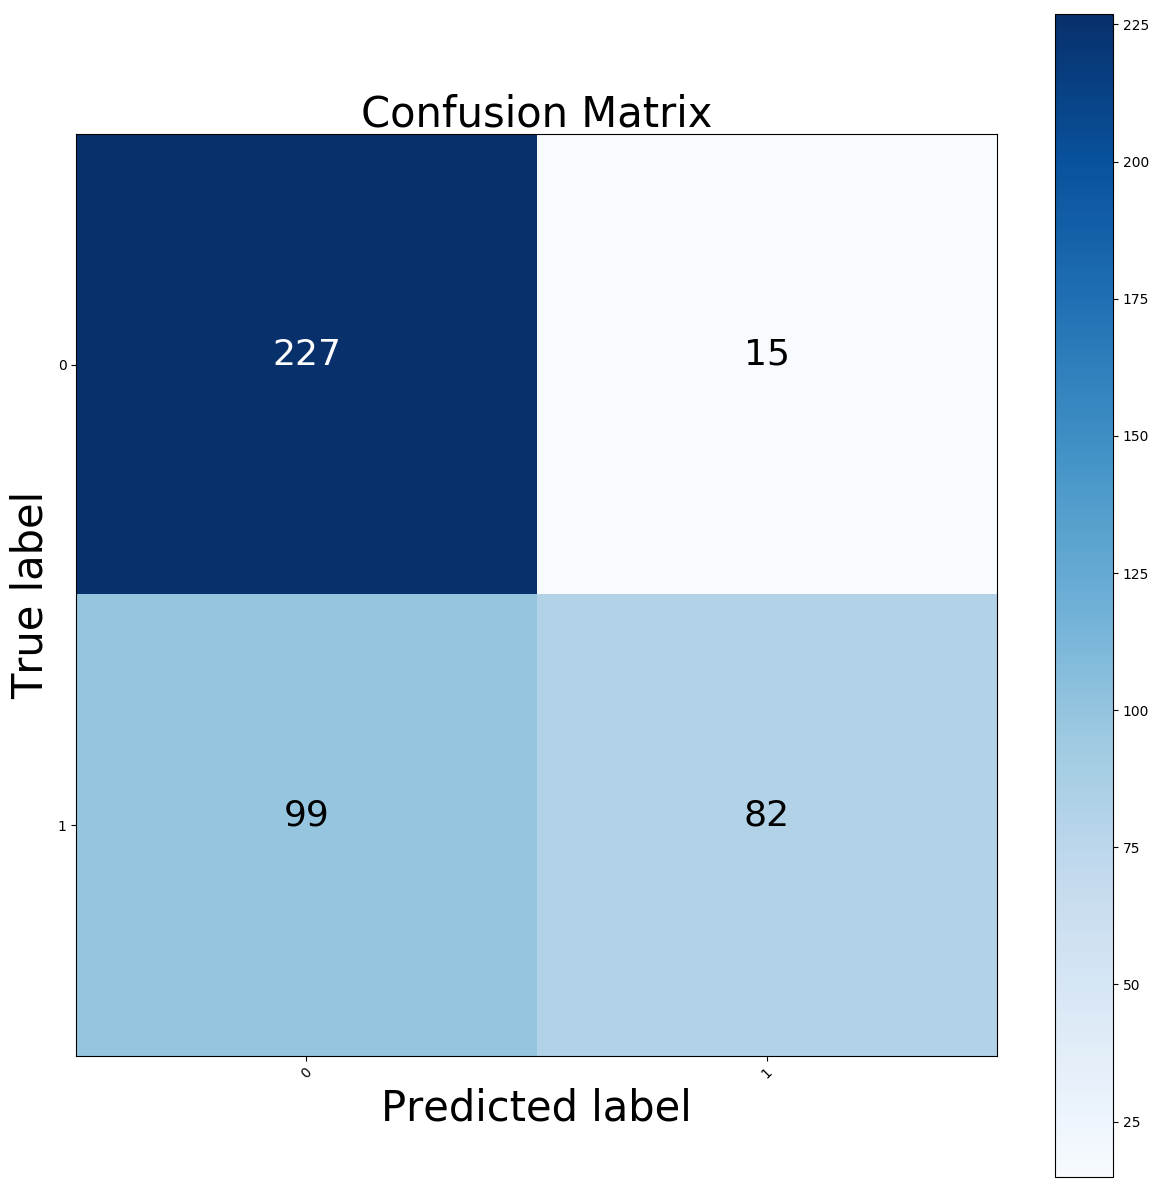

In [13]:
from sklearn.metrics import confusion_matrix

# calculate
confusion_matrix = confusion_matrix(testing_y, test_pred_ga_best)
normed_confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
num_classes = np.unique(classes)

cmap=plt.cm.Blues
plt.close()
plt.figure(figsize=(12, 12))
plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix', fontsize=30)
plt.colorbar()
tick_marks = np.arange(len(num_classes))
plt.xticks(tick_marks, num_classes, rotation=45)
plt.yticks(tick_marks, num_classes)
plt.tight_layout()

fmt = 'd'
thresh = confusion_matrix.max() / 2.0

for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
    plt.text(j, i, format(confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color='white' if confusion_matrix[i, j] > thresh else "black",
            size=26)


plt.tight_layout()
plt.ylabel('True label', fontsize=30)
plt.xlabel('Predicted label', fontsize=30)






Text(0.5, 107.98604349146878, 'Predicted label')

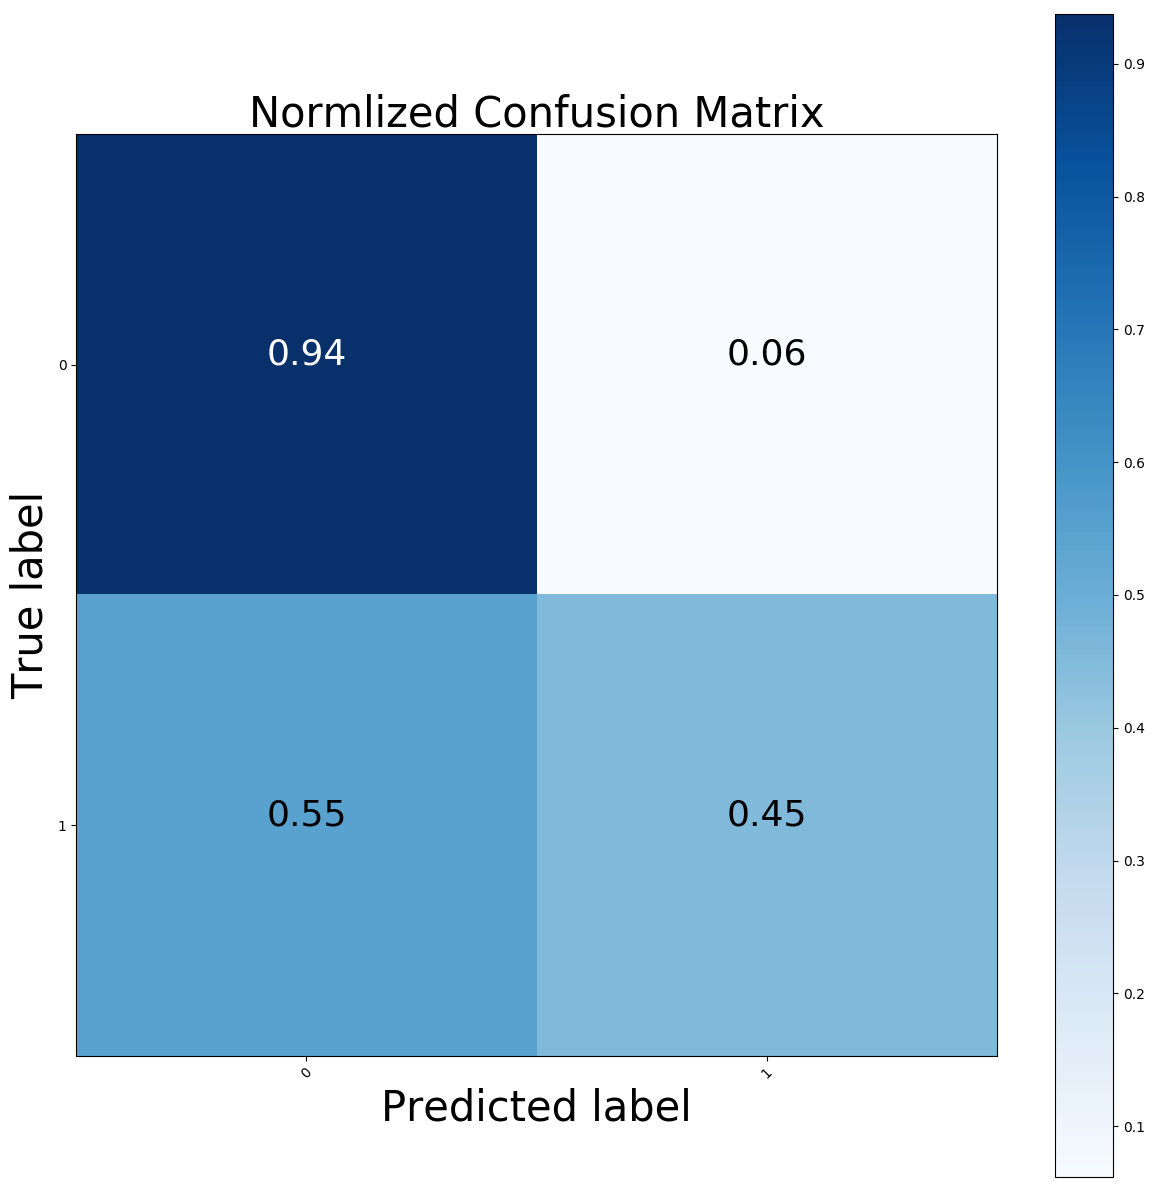

In [14]:
plt.close()
plt.figure(figsize=(12, 12))
plt.imshow(normed_confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Normlized Confusion Matrix', fontsize=30)
plt.colorbar()
tick_marks = np.arange(len(num_classes))
plt.xticks(tick_marks, num_classes, rotation=45)
plt.yticks(tick_marks, num_classes)
plt.tight_layout()

fmt = '.2f'
thresh = confusion_matrix.max() / 2.0
for i, j in itertools.product(range(normed_confusion_matrix.shape[0]), range(normed_confusion_matrix.shape[1])):
    plt.text(j, i, format(normed_confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color='white' if confusion_matrix[i, j] > thresh else "black",
            size=26)

plt.tight_layout()
plt.ylabel('True label', fontsize=30)
plt.xlabel('Predicted label', fontsize=30)

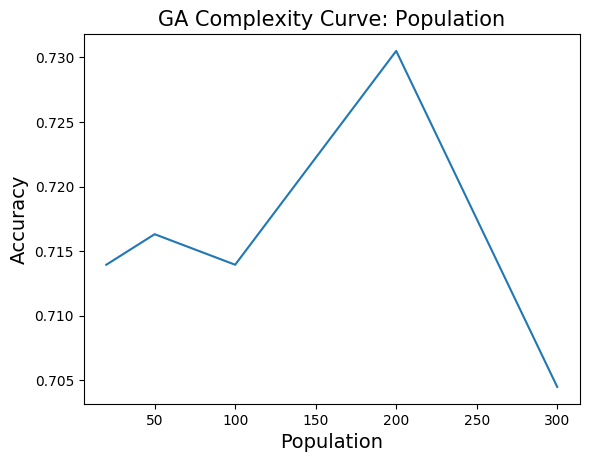

In [22]:
learning_rates = [10 ** -x for x in np.arange(2.0, 6.0)]
populations = [20, 50, 100, 200, 300]

test_acc_ga_list_ = np.asarray(test_acc_ga_list).T

fig,ax = plt.subplots()

ax.plot(populations, test_acc_ga_list_[:, 0])
ax.set_xlabel("Population",fontsize=14)
ax.set_ylabel("Accuracy",fontsize=14)

plt.title("GA Complexity Curve: Population",fontsize=15)
plt.show()

(222, 2)


Text(0.5, 1.0, 'Loss vs. Iterations for GA')

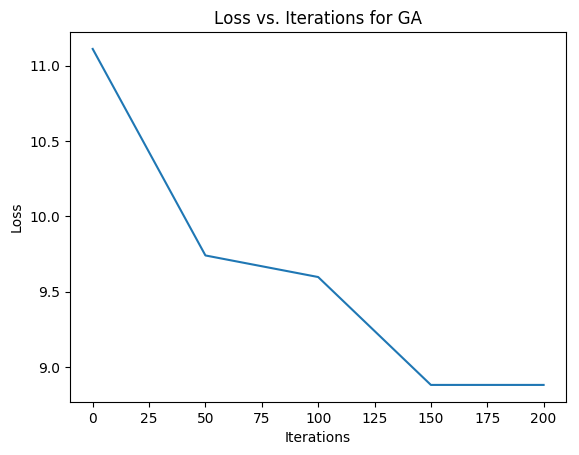

In [31]:
index = range(0, len(nn_ga_best.fitness_curve), 50)

print(nn_ga_best.fitness_curve.shape)
plt.figure()

plt.plot(index, nn_ga_best.fitness_curve[index, 0])

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations for GA')


In [32]:
train_sizes = np.append(np.linspace(0.05, 0.1, 20, endpoint=False),
                            np.linspace(0.1, 1, 20, endpoint=True))

ga_acc_train_sizes, ga_acc_train_scores, ga_acc_test_scores = sklearn.model_selection.learning_curve(
    nn_ga_best,
    training_x,
    training_y,
    cv=5,
    train_sizes=train_sizes,
    verbose=10,
    scoring=make_scorer(accuracy_score),
    n_jobs=4,
    random_state=seed)

[learning_curve] Training set sizes: [  67   70   74   77   81   84   87   91   94   97  101  104  108  111
  114  118  121  124  128  131  135  198  262  326  390  454  518  582
  646  710  774  838  902  966 1030 1094 1158 1222 1286 1350]


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of 200 | elapsed:   51.5s remaining: 13.4min
[Parallel(n_jobs=4)]: Done  33 out of 200 | elapsed:  2.9min remaining: 14.6min
[Parallel(n_jobs=4)]: Done  54 out of 200 | elapsed:  4.8min remaining: 12.9min
[Parallel(n_jobs=4)]: Done  75 out of 200 | elapsed:  7.0min remaining: 11.7min
[Parallel(n_jobs=4)]: Done  96 out of 200 | elapsed:  9.2min remaining:  9.9min
[Parallel(n_jobs=4)]: Done 117 out of 200 | elapsed: 11.7min remaining:  8.3min
[Parallel(n_jobs=4)]: Done 138 out of 200 | elapsed: 13.1min remaining:  5.9min
[Parallel(n_jobs=4)]: Done 159 out of 200 | elapsed: 15.5min remaining:  4.0min
[Parallel(n_jobs=4)]: Done 180 out of 200 | elapsed: 17.0min remaining:  1.9min
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed: 19.5min finished


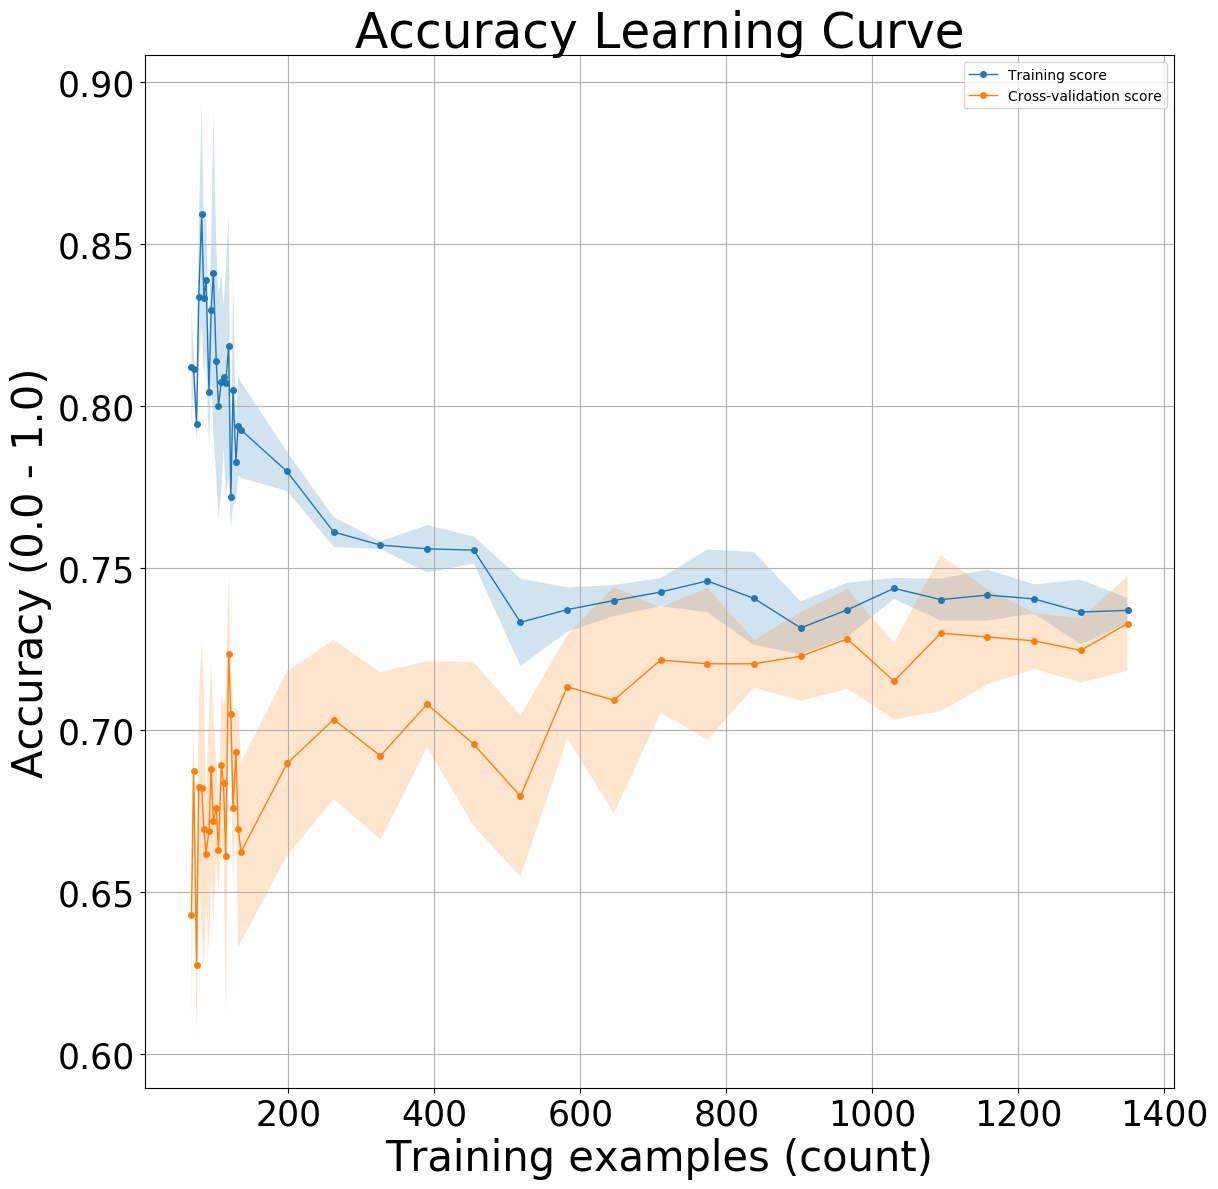

In [33]:
plt.close()
plt.figure(figsize=(12, 12))
plt.tick_params(labelsize=25)

plt.title('Accuracy Learning Curve', fontsize=35)

plt.xlabel('Training examples (count)', fontsize=30)
plt.ylabel('Accuracy (0.0 - 1.0)', fontsize=30)
plt.grid()
plt.tight_layout()

train_scores = ga_acc_train_scores
test_scores = ga_acc_test_scores
train_sizes = ga_acc_train_sizes

train_points = train_scores
test_points = test_scores

ax = plt.gca()
ax.set_xscale("linear")
ax.set_yscale("linear")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
train_points = train_scores_mean
test_points = test_scores_mean

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2)

plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
         label="Training score")
plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
         label="Cross-validation score")

plt.legend(loc="best")



# SA

In [39]:
learning_rates = [10 ** -x for x in np.arange(2.0, 6.0)]
temperatures = [0.1, 0.5, 0.75, 1.0, 2.0, 5.0]
test_acc_sa_best = 0.0
train_acc_sa_list = []
test_acc_sa_list = []

for learning_rate in learning_rates:
    print(learning_rate)
    sch_train_acc_sa_list = []
    sch_test_acc_sa_list = []
    for temp in temperatures:
        print(temp)

        nn_sa = mlrose_hiive.NeuralNetwork(hidden_nodes = [16,16], activation ='sigmoid', 
                                        algorithm ='simulated_annealing', schedule = mlrose_hiive.GeomDecay(init_temp = temp, decay=0.1, min_temp=temp),
                                        max_iters = 10000, bias = True, is_classifier = True, 
                                        learning_rate = learning_rate, early_stopping = True, 
                                        max_attempts = 100, random_state = seed, curve = True)

        nn_sa.fit(training_x, training_y)
        
        train_pred_sa = nn_sa.predict(training_x)
        train_acc_sa = accuracy_score(training_y, train_pred_sa)
        sch_train_acc_sa_list.append(train_acc_sa)
        
        test_pred_sa = nn_sa.predict(testing_x)
        test_acc_sa = accuracy_score(testing_y, test_pred_sa)
        sch_test_acc_sa_list.append(test_acc_sa)

        if test_acc_sa > test_acc_sa_best:
            nn_sa_best = nn_sa
            test_acc_sa_best = test_acc_sa
            test_pred_sa_best = test_pred_sa
            
    test_acc_sa_list.append(sch_test_acc_sa_list)
    train_acc_sa_list.append(sch_train_acc_sa_list)
            
print(nn_sa_best)


0.01
0.1
0.5
0.75
1.0
2.0
5.0
0.001
0.1
0.5
0.75
1.0
2.0
5.0
0.0001
0.1
0.5
0.75
1.0
2.0
5.0
1e-05
0.1
0.5
0.75
1.0
2.0
5.0
NeuralNetwork(activation='sigmoid', algorithm='simulated_annealing', bias=True,
              clip_max=10000000000.0, curve=True, early_stopping=True,
              hidden_nodes=[16, 16], is_classifier=True, learning_rate=0.01,
              max_attempts=100, max_iters=10000, mutation_prob=0.1,
              pop_size=200, random_state=5, restarts=0,
              schedule=GeomDecay(init_temp=0.1, decay=0.1, min_temp=0.1))


Text(0.5, 110.48604349146878, 'Predicted label')

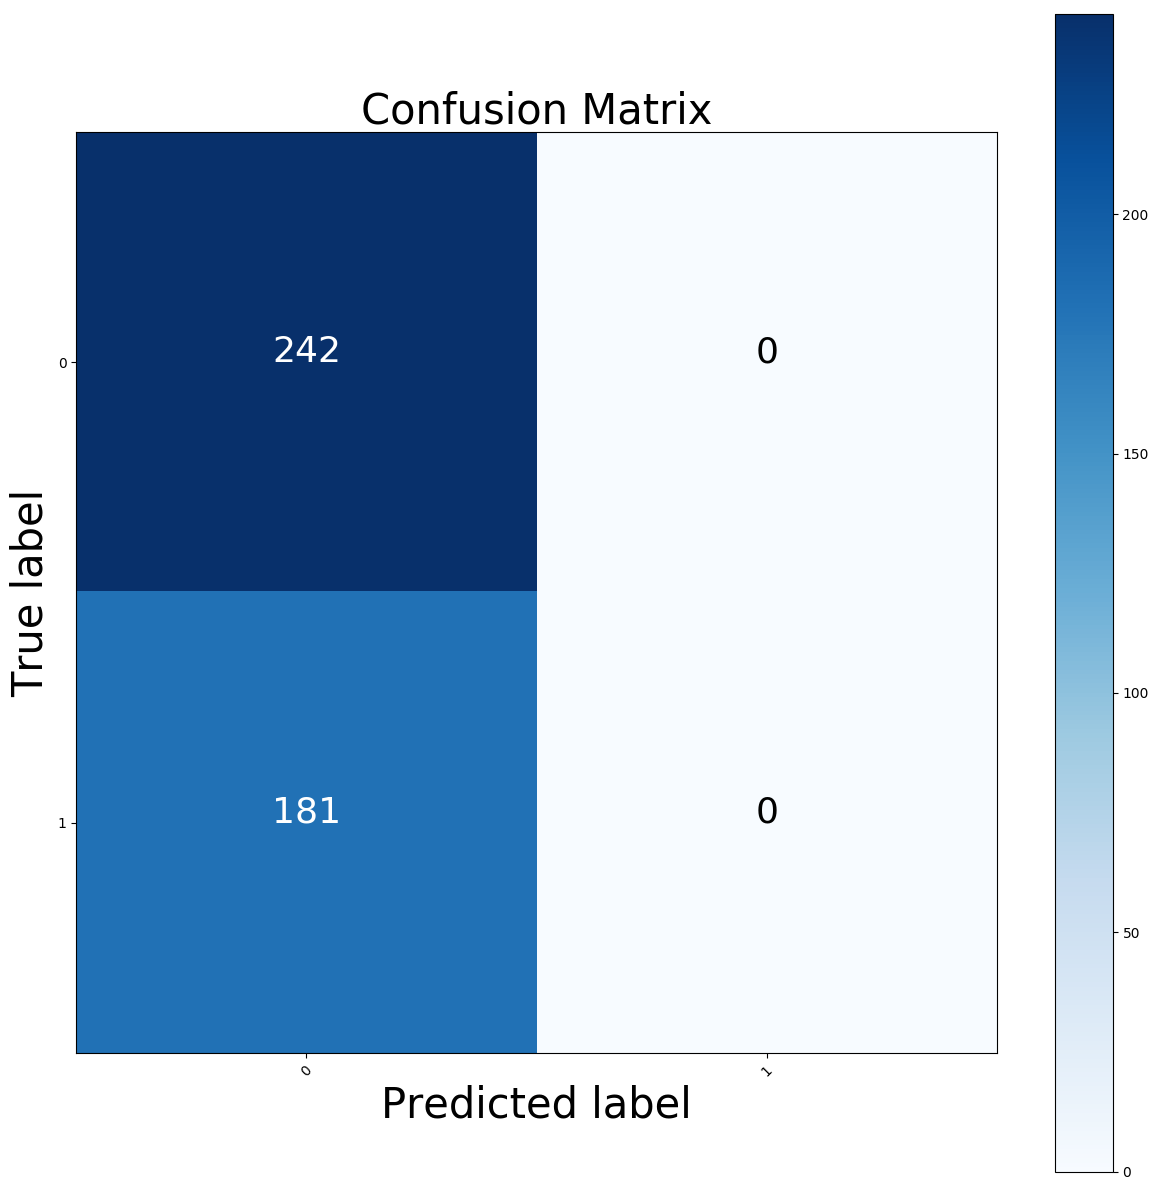

In [40]:
from sklearn.metrics import confusion_matrix

# calculate
confusion_matrix = confusion_matrix(testing_y, test_pred_sa_best)
normed_confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
num_classes = np.unique(classes)

cmap=plt.cm.Blues
plt.close()
plt.figure(figsize=(12, 12))
plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix', fontsize=30)
plt.colorbar()
tick_marks = np.arange(len(num_classes))
plt.xticks(tick_marks, num_classes, rotation=45)
plt.yticks(tick_marks, num_classes)
plt.tight_layout()

fmt = 'd'
thresh = confusion_matrix.max() / 2.0

for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
    plt.text(j, i, format(confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color='white' if confusion_matrix[i, j] > thresh else "black",
            size=26)


plt.tight_layout()
plt.ylabel('True label', fontsize=30)
plt.xlabel('Predicted label', fontsize=30)






Text(0.5, 109.48604349146875, 'Predicted label')

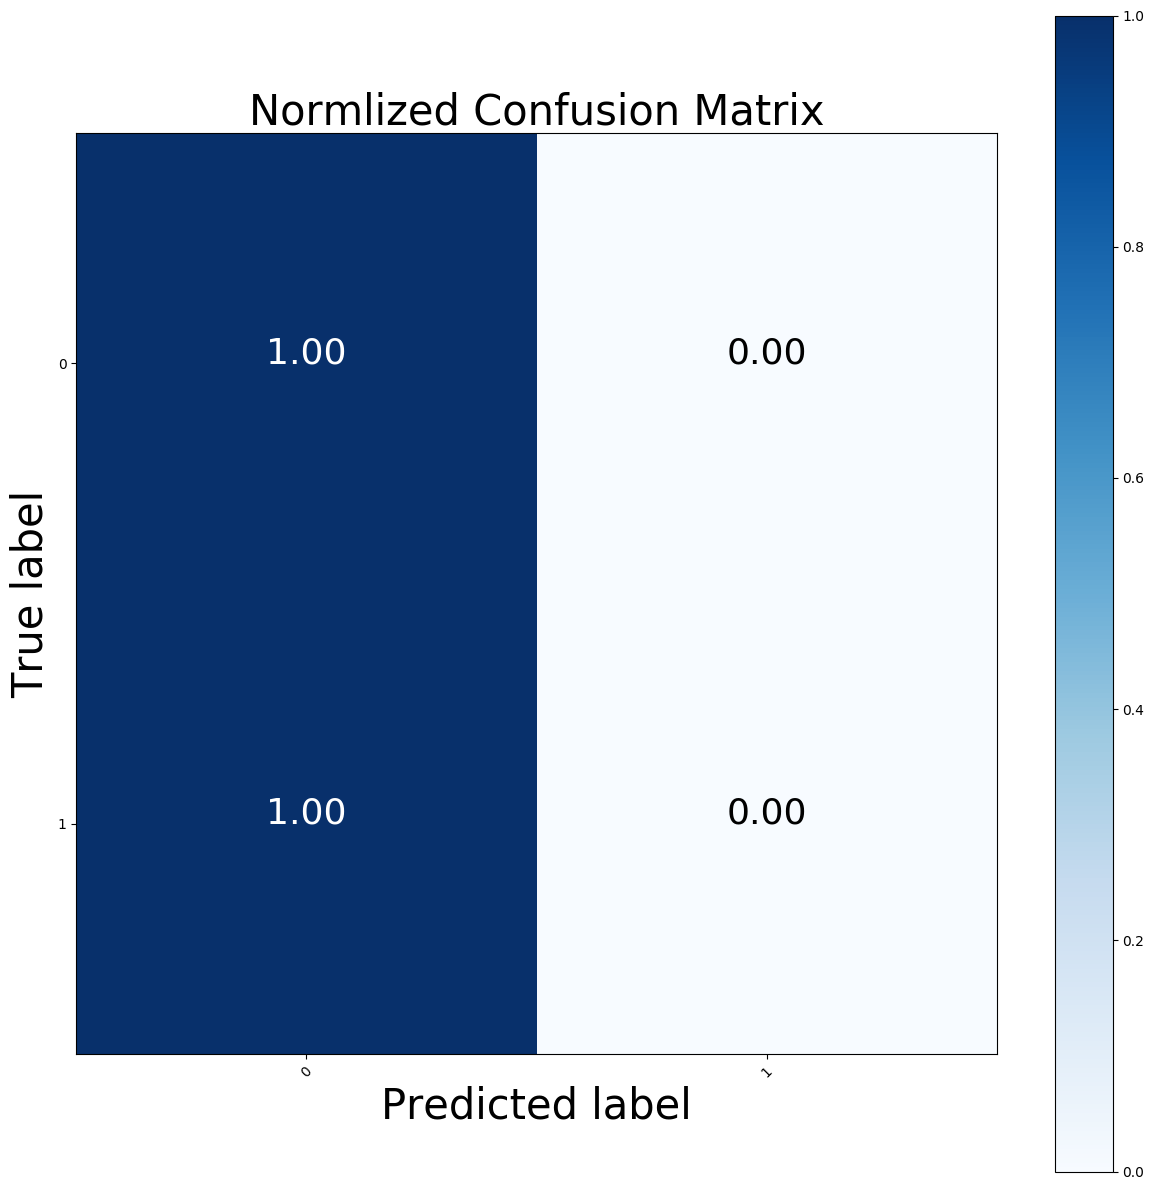

In [41]:
plt.close()
plt.figure(figsize=(12, 12))
plt.imshow(normed_confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Normlized Confusion Matrix', fontsize=30)
plt.colorbar()
tick_marks = np.arange(len(num_classes))
plt.xticks(tick_marks, num_classes, rotation=45)
plt.yticks(tick_marks, num_classes)
plt.tight_layout()

fmt = '.2f'
thresh = confusion_matrix.max() / 2.0
for i, j in itertools.product(range(normed_confusion_matrix.shape[0]), range(normed_confusion_matrix.shape[1])):
    plt.text(j, i, format(normed_confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color='white' if confusion_matrix[i, j] > thresh else "black",
            size=26)

plt.tight_layout()
plt.ylabel('True label', fontsize=30)
plt.xlabel('Predicted label', fontsize=30)

In [ ]:
learning_rates = [10 ** -x for x in np.arange(2.0, 6.0)]

test_acc_sa_list_ = np.asarray(test_acc_sa_list)

fig,ax = plt.subplots()

ax.plot(learning_rates, test_acc_sa_list_)
ax.set_xlabel("Learning Rate",fontsize=14)
ax.set_ylabel("Accuracy",fontsize=14)

ax.legend(["GeomDecay","ExpDecay","ArithDecay"])
# schedules = [mlrose_hiive.GeomDecay(), mlrose_hiive.ExpDecay(), mlrose_hiive.ArithDecay()]


plt.title("SA Complexity Curve: Learning Rate & Schedules",fontsize=15)
plt.show()

In [ ]:
index = range(0, len(nn_sa_best.fitness_curve), 50)


plt.figure()

plt.plot(index, -nn_sa_best.fitness_curve[index])

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations for GA')


In [42]:
train_sizes = np.append(np.linspace(0.05, 0.1, 20, endpoint=False),
                            np.linspace(0.1, 1, 20, endpoint=True))

sa_acc_train_sizes, sa_acc_train_scores, sa_acc_test_scores = sklearn.model_selection.learning_curve(
    nn_sa_best,
    training_x,
    training_y,
    cv=5,
    train_sizes=train_sizes,
    verbose=10,
    scoring=make_scorer(accuracy_score),
    n_jobs=4,
    random_state=seed)

[learning_curve] Training set sizes: [  67   70   74   77   81   84   87   91   94   97  101  104  108  111
  114  118  121  124  128  131  135  198  262  326  390  454  518  582
  646  710  774  838  902  966 1030 1094 1158 1222 1286 1350]


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of 200 | elapsed:   25.4s remaining:  6.6min
[Parallel(n_jobs=4)]: Done  33 out of 200 | elapsed:  1.6min remaining:  7.9min
[Parallel(n_jobs=4)]: Done  54 out of 200 | elapsed:  2.5min remaining:  6.7min
[Parallel(n_jobs=4)]: Done  75 out of 200 | elapsed:  3.7min remaining:  6.1min
[Parallel(n_jobs=4)]: Done  96 out of 200 | elapsed:  4.5min remaining:  4.8min
[Parallel(n_jobs=4)]: Done 117 out of 200 | elapsed:  5.7min remaining:  4.1min
[Parallel(n_jobs=4)]: Done 138 out of 200 | elapsed:  6.4min remaining:  2.9min
[Parallel(n_jobs=4)]: Done 159 out of 200 | elapsed:  7.7min remaining:  2.0min
[Parallel(n_jobs=4)]: Done 180 out of 200 | elapsed:  8.4min remaining:   56.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:  9.7min finished


In [ ]:
plt.close()
plt.figure(figsize=(12, 12))
plt.tick_params(labelsize=25)

plt.title('Accuracy Learning Curve', fontsize=35)

plt.xlabel('Training examples (count)', fontsize=30)
plt.ylabel('Accuracy (0.0 - 1.0)', fontsize=30)
plt.grid()
plt.tight_layout()

train_scores = sa_acc_train_scores
test_scores = sa_acc_test_scores
train_sizes = sa_acc_train_sizes

train_points = train_scores
test_points = test_scores

ax = plt.gca()
ax.set_xscale("linear")
ax.set_yscale("linear")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
train_points = train_scores_mean
test_points = test_scores_mean

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2)

plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
         label="Training score")
plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
         label="Cross-validation score")

plt.legend(loc="best")



# Time Curve

In [62]:
# random_hill_climb

RHC_train_sizes, RHC_train_times, RHC_test_times = [], [], []
for frac in np.linspace(0.1, 1.0, 10):
    print(frac)
    n = int(frac * len(training_x))
    training_x_sub, training_y_sub = training_x[:n], training_y[:n]
    
    start_time = time.time()
    nn_rhc_best.fit(training_x_sub, training_y_sub)
    train_time = time.time() - start_time
    RHC_train_times.append(train_time)
    start_time = time.time()
    nn_rhc_best.predict(training_x_sub)
    test_time = time.time() - start_time
    RHC_test_times.append(test_time)
    RHC_train_sizes.append(n)

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9
1.0


In [63]:
# simulated_annealing

SA_train_sizes, SA_train_times, SA_test_times = [], [], []
for frac in np.linspace(0.1, 1.0, 10):
    print(frac)
    n = int(frac * len(training_x))
    training_x_sub, training_y_sub = training_x[:n], training_y[:n]
    start_time = time.time()
    nn_sa_best.fit(training_x_sub, training_y_sub)
    train_time = time.time() - start_time
    SA_train_times.append(train_time)
    start_time = time.time()
    nn_sa_best.predict(training_x_sub)
    test_time = time.time() - start_time
    SA_test_times.append(test_time)
    SA_train_sizes.append(n)

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9
1.0


In [64]:
# genetic_alg

GA_train_sizes, GA_train_times, GA_test_times = [], [], []
for frac in np.linspace(0.1, 1.0, 10):
    print(frac)

    n = int(frac * len(training_x))
    training_x_sub, training_y_sub = training_x[:n], training_y[:n]
    start_time = time.time()
    nn_ga_best.fit(training_x_sub, training_y_sub)
    train_time = time.time() - start_time
    GA_train_times.append(train_time)
    start_time = time.time()
    nn_ga_best.predict(training_x_sub)
    test_time = time.time() - start_time
    GA_test_times.append(test_time)
    GA_train_sizes.append(n)

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9
1.0


In [67]:
# gradient_descent

Grad_train_sizes, Grad_train_times, Grad_test_times = [], [], []
for frac in np.linspace(0.1, 1.0, 10):
    print(frac)

    n = int(frac * len(training_x))
    training_x_sub, training_y_sub = training_x[:n], training_y[:n]
    start_time = time.time()
    nn_grad_best.fit(training_x_sub, training_y_sub)
    train_time = time.time() - start_time
    Grad_train_times.append(train_time)
    start_time = time.time()
    nn_grad_best.predict(training_x_sub)
    test_time = time.time() - start_time
    Grad_test_times.append(test_time)
    Grad_train_sizes.append(n)

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9
1.0


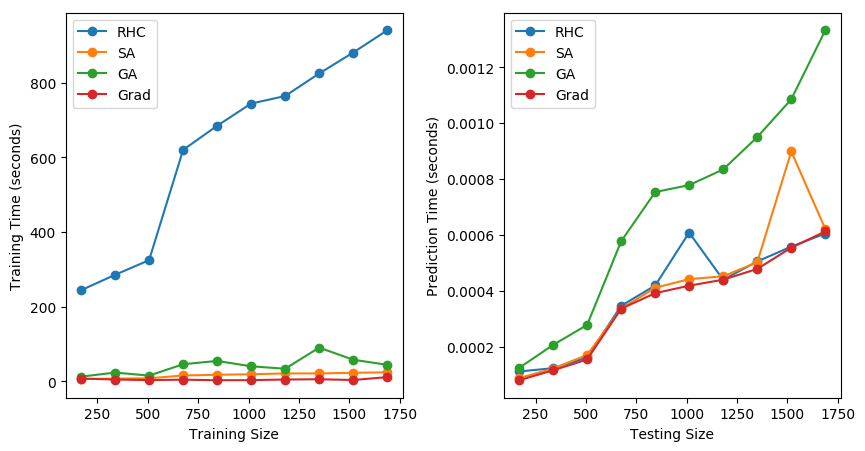

In [71]:
# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
plt.subplots_adjust(wspace=0.3)


ax1.plot(RHC_train_sizes, RHC_train_times, 'o-', label="RHC")
ax1.plot(SA_train_sizes, SA_train_times, 'o-', label="SA")
ax1.plot(GA_train_sizes, GA_train_times, 'o-', label="GA")
ax1.plot(Grad_train_sizes, Grad_train_times, 'o-', label="Grad")

ax2.plot(RHC_train_sizes, RHC_test_times, 'o-', label="RHC")
ax2.plot(SA_train_sizes, SA_test_times, 'o-', label="SA")
ax2.plot(GA_train_sizes, GA_test_times, 'o-', label="GA")
ax2.plot(Grad_train_sizes, Grad_test_times, 'o-', label="Grad")

ax1.set_xlabel("Training Size")
ax1.set_ylabel("Training Time (seconds)")
ax1.legend(loc="best")
ax2.set_xlabel("Testing Size")
ax2.set_ylabel("Prediction Time (seconds)")
ax2.legend(loc="best")

plt.show()